In [2]:
import torch
from torch import nn
from matplotlib import pyplot as plt

In [ ]:
# Steps for fitting a model: 

<img src="modeling_process.png" width=1000 height=800 style="horizontal-align:bottom">

# Arbitrary curve

${f(x) = x^{2} - 3 x - 7}$

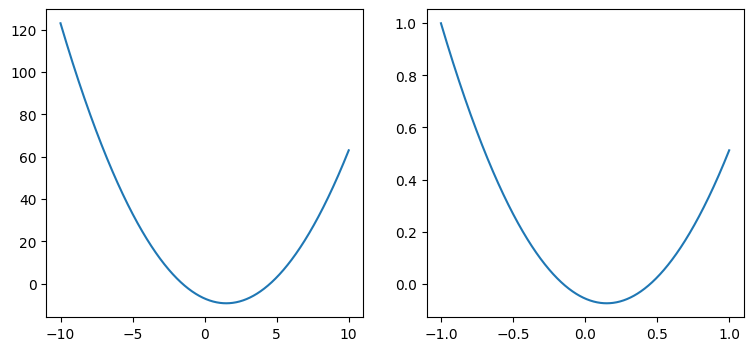

In [92]:
def curve1(x):
    return x**2 - 3 * x - 7

n_points = 1000
x = torch.linspace(-10, 10, n_points)
y = curve1(x)

y_true = y / y.max()
x_inputs = x / x.max()

plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(x, curve1(x))

plt.subplot(1, 2, 2)
_ = plt.plot(x_inputs, y_true)

There are two ways to update the model's weights and biases during each epoch:

- Update once, by computing the gradients over the entire dataset (1 batch).
- (**prefered**) Update more than once, by computing the gradients over batches of the dataset (B batches).

Split the data into batches:

In [93]:
y_true = y_true.reshape(-1, 10, 1)
x_inputs = x_inputs.reshape(-1, 10, 1)
x_inputs.shape

torch.Size([100, 10, 1])

## Model defined manually

In [94]:
yprima = y.reshape(-1, 1)
q = x.reshape(-1, 1)

In [95]:
w = torch.rand(size=(1, 1))
b = torch.zeros(size=(1, 1))
w, b

(tensor([[0.1092]]), tensor([[0.]]))

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize w1 and b
w = torch.tensor([[10]])  # w(1,1) = 10;
b = torch.tensor([5])     # b(1) = 5;

# Uncomment these values for other settings (like in the original code):
# w = np.array([[0.8]])
# b = np.array([3.6])

# Training the neural network
learning_rate = 0.0001  # Learning rate
niter = 200   # Number of iterations
n_points = len(q)  # Assuming q is already defined

# Figure for plotting
plt.figure()
line = plt.plot([], [], '-ok')

errors = []
for i in range(niter):
    # Calculate the prediction
    y = q * w + b  # Assuming q is already defined and has the correct shape

    # Calculate the mean squared error for monitoring the prediction
    error = (1 / (2 * n_points)) * torch.sum((y - yprima) ** 2)  # Assuming yprima is defined
    errors.append(error)

    line
    clear_output()
    plt.pause(0.0001)  # Small pause for animation effect
    
    # Calculate delta
    delta = y - yprima

    # Update the weights
    wi_1 = np.zeros_like(w)
    bi_1 = np.zeros_like(b)

    for ii in range(n_points):
        # wi_1[ii, 0] = w[0, 0] - alpha * x[ii, 0] * delta[ii, 0]  # Commented out like in the original code
        wi_1 = w - learning_rate * q[ii] * delta[ii]  # Updating weights
        bi_1 = b - learning_rate * delta[ii]          # Updating bias

    # Average the weights and bias updates
    w = torch.mean(wi_1)
    b = torch.mean(bi_1)

# Hold off on further plotting
plt.show()

# Testing the neural network with new data
yt = np.dot(qt, w) + b  # Prediction for test data, assuming qt is defined

# Calculate the test error
errort = (1 / (2 * ntest)) * np.sum((yt - yprimat) ** 2)  # Assuming yprimat is defined and ntest

# Plot the prediction for training and test data
plt.figure()
plt.plot(q, y, label='Training Prediction')  # Assuming q is defined
plt.plot(qt, yt, 'o', label='Test Prediction')  # Assuming qt is defined
plt.legend()
plt.show()

KeyboardInterrupt: 

## Model defined in torch

In [ ]:
# Build the model: 1 Fully-connected layer (FCL) + Relu activation + 1 FCL (as output)
model = nn.Sequential()
model.append(nn.Linear(1, 1))
model.append(nn.ReLU())
model.append(nn.Linear(1, 1))

1-th model checkpoint
Mean loss at epoch 25:
	0.0024992795661091805
Mean loss at epoch 50:
	0.0007622946286574006
Mean loss at epoch 75:
	0.00037525861989706755
Mean loss at epoch 100:
	0.00021351681789383292
2-th model checkpoint
Mean loss at epoch 125:
	0.00015242000517901033
Mean loss at epoch 150:
	0.00013760107685811818
Mean loss at epoch 175:
	0.00012982086627744138
Mean loss at epoch 200:
	0.00013474274601321667
3-th model checkpoint
Mean loss at epoch 225:
	0.0003674955805763602
Mean loss at epoch 250:
	0.00010948639101115987
Mean loss at epoch 275:
	0.00011100220581283793
Mean loss at epoch 300:
	0.00019753159722313285
4-th model checkpoint
Mean loss at epoch 325:
	0.00016254068759735674
Mean loss at epoch 350:
	0.0001562347315484658
Mean loss at epoch 375:
	0.00018563480989541858
Mean loss at epoch 400:
	0.00014084319991525263
5-th model checkpoint
Mean loss at epoch 425:
	9.777590457815677e-05
Mean loss at epoch 450:
	0.00011896638898178935
Mean loss at epoch 475:
	0.0001700

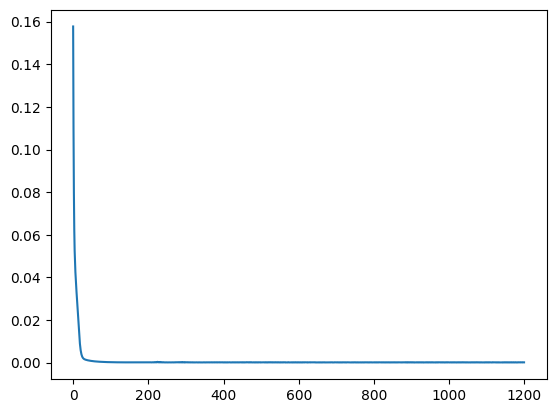

In [55]:
# Define the loss criterion to estimate the losses to be applied to update the parameters
criterion = nn.MSELoss()
# Define the algorithm for gradient calculators. 
optimizer = torch.optim.Adam(model.parameters())

epochs = 1200
avg_losses = []
std_losses = []
model_checkpoints = []
n_show_log = 25
n_save_checkpoint = 100

from copy import deepcopy

# Optimize/fit the model epochs times.
for epoch in range(epochs):
    local_losses = []
    # Apply mini-batch 
    for inputs, target in zip(x_inputs, y_true):
        # Reset the gradients to zero in order to recompute them for a new batch
        optimizer.zero_grad()
        # Feed-forward step: compute the outputs
        outputs = model(inputs)

        # Compute the loss of between the current batch output and batch target
        loss = criterion(outputs, target)
        local_losses.append(loss)

        # Backpropagation step: compute and store the gradients via the loss
        loss.backward()
        # Apply gradient descent to update the parameters of the model (weights and biases)
        optimizer.step()

    ## ...At the end of the epoch... ##
    # Compute the mean of the loss
    mean_loss = sum(local_losses) / len(local_losses)
    avg_losses.append(mean_loss.item())

    # Compute the standard deviation (std) of the loss
    std_loss = torch.sum((torch.tensor(local_losses) - mean_loss)**2) / len(local_losses)
    std_losses.append(std_loss.item())

    # Show the log of losses
    if epoch > 0 and (epoch % n_show_log == 0):
        print(f"Mean loss at epoch {epoch}:\n\t{mean_loss}")
    
    # Ckeckpoint for models
    if epoch % n_save_checkpoint == 0:
        model_checkpoints.append(deepcopy(model.state_dict()))
        print(f"{len(model_checkpoints)}-th model checkpoint")

# Plot the losses
plt.plot(avg_losses)

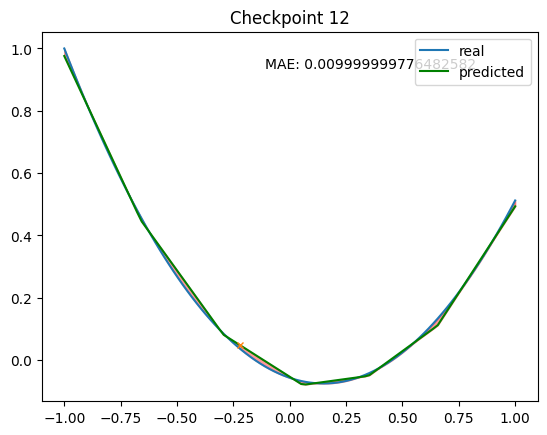

KeyboardInterrupt: 

In [58]:
model.eval()
x = torch.linspace(-10, 10, 100)
x_norm = x / x.max()
y = curve1(x)
y_norm = y / y.max()

#real_curve, *_ = axes.plot([], [])
#pred_curve, *_ = axes.plot([], [])
#test_curve, *_ = axes.plot([], [])

#axes.set_xlim(-10, 10)
#axes.set_ylim(-10, 10)

from time import sleep
from IPython.display import clear_output
import numpy as np

for i, state_dict in enumerate(model_checkpoints):
    clear_output()
    model.load_state_dict(state_dict)
    preds = model(x_norm.reshape(-1, 1)).detach().squeeze()
    # Compute mae
    mae_eval_loss = torch.abs(preds - y_norm).sum() / len(preds)
    test_point = 0.1 * torch.randn(1)
    test_pred = model(test_point).detach()

    fig, axes = plt.subplots(1, 1)
    axes.plot(x_norm, y_norm, label="real")
    axes.plot(x_norm, preds, label="predicted", color="green")
    axes.plot(test_point, test_pred, markersize=5, marker="x")
    axes.fill_between(x_norm, y_norm, y2=preds, alpha=0.4, color="red")
    axes.annotate(f"MAE: {torch.round(mae_eval_loss, decimals=2)}", xy=(0.45, 0.9), xycoords='axes fraction')
    
    axes.set_title(f"Checkpoint {i + 1}")
    plt.legend()
    plt.show()
    #real_curve.set_xdata(x)
    #real_curve.set_ydata(preds)
    #pred_curve.set_xdata(x)
    #pred_curve.set_ydata(preds)
    #test_curve.set_xdata(test_point)
    #test_curve.set_ydata(test_pred)
    
    sleep(3)

# Simple deflection of a beam

Create a model of one neuron to predict the deflection of a simply supported
beam subjected to its own weight (see expression [1]) and to a uniform distributed
loading q

$$\large q_{m} = den \cdot b \cdot h \cdot L$$

## Modeling Cycle

In [3]:
import torch

In [11]:
# Beam data

E_module = 30_000 # N / m2
width = 300 # 300 mm
height = 600 # 600 mm
length = 10000 # 10_000 mm
density = 25 # kN / m3

## Maximum deflection:

$$\large {y_{max}=\frac{5 \cdot q \cdot L^4}{384 \cdot E_{yg} \cdot I_{2}} }$$

In [16]:
def compute_load_weight(density, width, height, length):
    """
    Compute the load due to the own weight of a rectangular beam
    """
    return density * width * height * length * 10e-6

def compute_beam_inertia(width, height):
    """
    Compute the second moment of inertia of a rectangular beam
    """
    return (width * height**3) / 12
    
def max_arrow(q, length, young_module, inertia_2):
    """
    Compute the deflection due to the own weight of a rectangular beam
    """
    arrow_const = (5 * length**4) / (384 * young_module * inertia_2)
    return q * arrow_const

In [17]:
def generate_training_data(n_samples, width, height, length, density, young_module):
    inertia_2 = compute_beam_inertia(width, height)
    # Loads: own weight and distributed load
    q_weight = compute_load_weight(density, width, height, length)
    q_dist_load = 100 * torch.rand(size=(n_samples, ))
    
    # Deflections: own weight and distributed
    y_max_weight = max_arrow(q_weight, length, young_module, inertia_2) # y_max
    if not isinstance(y_max_weight, torch.Tensor):
        y_max_weight = torch.tensor(y_max_weight)
    y_max_dist = max_arrow(q_dist_load, length, young_module, inertia_2) # y_max
    
    return q_dist_load, y_max_dist + y_max_weight

In [39]:
n_samples = 1000
 
x, y = generate_training_data(n_samples, width, height, length, density, E_module)
x.shape, y.shape

(torch.Size([1000]), torch.Size([1000]))

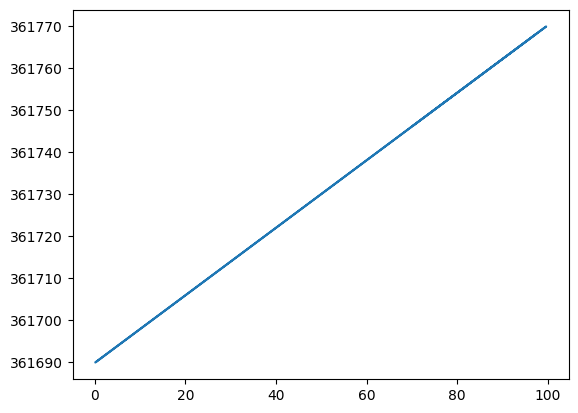

In [40]:
plt.plot(x, y)

In [44]:
y_true = y / y.max()
x_inputs = x / x.max()

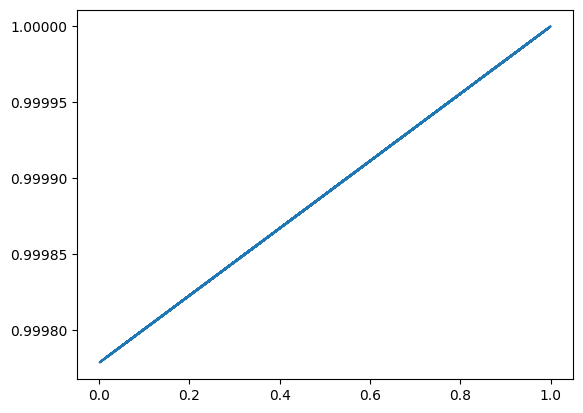

In [45]:
plt.plot(x_inputs, y_true)

In [46]:
y_true = y_true.reshape(50, -1, 1)
x_inputs = x_inputs.reshape(50, -1, 1)
x_inputs.shape

torch.Size([50, 20, 1])

1-th model checkpoint
Mean loss at epoch 25:
	129893883904.0
Mean loss at epoch 50:
	126410719232.0
Mean loss at epoch 75:
	121085460480.0
Mean loss at epoch 100:
	114489753600.0
2-th model checkpoint
Mean loss at epoch 125:
	106957520896.0
Mean loss at epoch 150:
	98718777344.0
Mean loss at epoch 175:
	90005037056.0
Mean loss at epoch 200:
	81057783808.0
3-th model checkpoint
Mean loss at epoch 225:
	72130125824.0
Mean loss at epoch 250:
	63484477440.0
Mean loss at epoch 275:
	55388381184.0
Mean loss at epoch 300:
	48107151360.0
4-th model checkpoint
Mean loss at epoch 325:
	41891758080.0
Mean loss at epoch 350:
	36958187520.0
Mean loss at epoch 375:
	33449707520.0
Mean loss at epoch 400:
	31367907328.0
5-th model checkpoint
Mean loss at epoch 425:
	30465495040.0
Mean loss at epoch 450:
	30218518528.0
Mean loss at epoch 475:
	30149240832.0
Mean loss at epoch 500:
	30097887232.0
6-th model checkpoint
Mean loss at epoch 525:
	30046480384.0
Mean loss at epoch 550:
	29994516480.0
Mean los

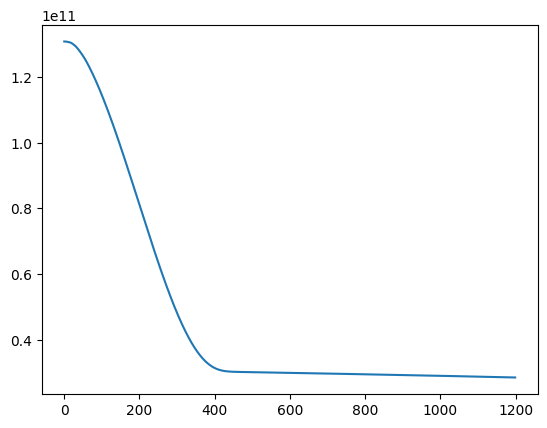

In [43]:
# Build the model: 1 Fully-connected layer (FCL) + Relu activation + 1 FCL (as output)
model = nn.Sequential()
model.append(nn.Linear(1, 16))
model.append(nn.ReLU())
model.append(nn.Linear(16, 1))

# Define the loss criterion to estimate the losses to be applied to update the parameters
criterion = nn.MSELoss()
# Define the algorithm for gradient calculators. 
optimizer = torch.optim.Adam(model.parameters())

epochs = 1200
avg_losses = []
std_losses = []
model_checkpoints = []
n_show_log = 25
n_save_checkpoint = 100

from copy import deepcopy

# Optimize/fit the model epochs times.
for epoch in range(epochs):
    local_losses = []
    # Apply mini-batch 
    for inputs, target in zip(x_inputs, y_true):
        # Reset the gradients to zero in order to recompute them for a new batch
        optimizer.zero_grad()
        # Feed-forward step: compute the outputs
        outputs = model(inputs)

        # Compute the loss of between the current batch output and batch target
        loss = criterion(outputs, target)
        local_losses.append(loss)

        # Backpropagation step: compute and store the gradients via the loss
        loss.backward()
        # Apply gradient descent to update the parameters of the model (weights and biases)
        optimizer.step()

    ## ...At the end of the epoch... ##
    # Compute the mean of the loss
    mean_loss = sum(local_losses) / len(local_losses)
    avg_losses.append(mean_loss.item())

    # Compute the standard deviation (std) of the loss
    std_loss = torch.sum((torch.tensor(local_losses) - mean_loss)**2) / len(local_losses)
    std_losses.append(std_loss.item())

    # Show the log of losses
    if epoch > 0 and (epoch % n_show_log == 0):
        print(f"Mean loss at epoch {epoch}:\n\t{mean_loss}")
    
    # Ckeckpoint for models
    if epoch % n_save_checkpoint == 0:
        model_checkpoints.append(deepcopy(model.state_dict()))
        print(f"{len(model_checkpoints)}-th model checkpoint")

# Plot the losses
plt.plot(avg_losses)

In [ ]:
model.eval()
x = torch.linspace(-10, 10, 100)
y = curve1(x)

#real_curve, *_ = axes.plot([], [])
#pred_curve, *_ = axes.plot([], [])
#test_curve, *_ = axes.plot([], [])

#axes.set_xlim(-10, 10)
#axes.set_ylim(-10, 10)

from time import sleep
from IPython.display import clear_output
import numpy as np

for i, state_dict in enumerate(model_checkpoints):
    clear_output()
    model.load_state_dict(state_dict)
    preds = model(x.reshape(-1, 1)).detach().squeeze()
    # Compute mae
    mae_eval_loss = torch.abs(preds - y).sum() / len(preds)
    test_point = torch.randn(1)
    test_pred = model(test_point).detach()

    fig, axes = plt.subplots(1, 1)
    axes.plot(x, y, label="real")
    axes.plot(x, preds, label="predicted", color="green")
    axes.plot(test_point, test_pred, markersize=5, marker="x")
    axes.fill_between(x, y, y2=preds, alpha=0.4, color="red")
    axes.annotate(f"MAE: {torch.round(mae_eval_loss, decimals=2)}", xy=(0.45, 0.9), xycoords='axes fraction')
    
    axes.set_title(f"Checkpoint {i + 1}")
    plt.legend()
    plt.show()
    #real_curve.set_xdata(x)
    #real_curve.set_ydata(preds)
    #pred_curve.set_xdata(x)
    #pred_curve.set_ydata(preds)
    #test_curve.set_xdata(test_point)
    #test_curve.set_ydata(test_pred)
    
    sleep(3)